## Notebook 2: gráficos

<br>
<br>

Execute a célula abaixo para:

- permitir criar gráficos. 
- carregar o pandas.
- carregar o matplotlib (o pacote de gráficos), na sua versão mais simples (pyplot).
- carregar o seaborn (um pacote que aumenta o matplotlib, deixando os gráficos mais bonitos e criando gráficos estatísticos).
- usando o seaborn, definir o estilo dos gráficos como fundo branco com linhas de grade e escolher uma paleta de cores.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel') 

Estilos disponíveis: darkgrid, whitegrid, dark, white, ticks

Paletas disponíveis: deep, pastel, bright, muted, dark, colorblind e [dezenas de outras](matplotlib.org/users/colormaps.html).

<br>
<br>
Vamos carregar os dados da pnad.

In [2]:
pnad = pd.read_csv('pnad_amostra.csv')

Para fazer um histograma com 20 classes:

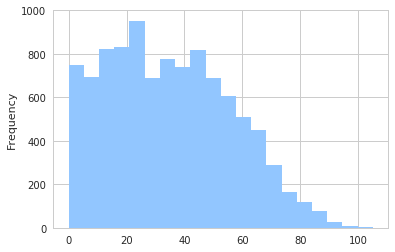

In [3]:
pnad.idade.plot.hist(20);

Para mudar a cor do gráfico, basta usar o argumento `color` e indicar o nome da cor em inglês, entre aspas.

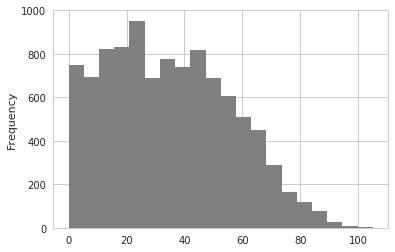

In [4]:
pnad.idade.plot.hist(20, color='gray');

Vamos trocar o estilo e a paleta de cores:

In [5]:
sns.set(style='dark', palette='Set1')

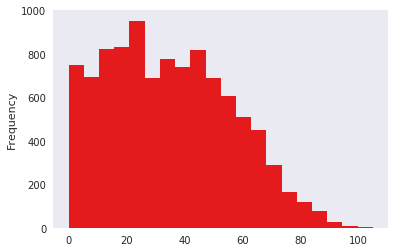

In [6]:
pnad.idade.plot.hist(20);

Se você executar novamente o primeiro gráfico, ele também mudará de estilo. Todas as vezes que você usar o comando `sns.set()`, ele alterará todos os gráficos que forem feitos dali em diante.

Um estilo de gráfico bastante divertido é o que imita os quadrinhos *xkcd*. O comando nesse caso é diferente e se aplica apenas ao gráfico criado na célula em que ele está (se aparecer uma mensagem de erro, desconsidere, ela se refere ao estilo da fonte).

/home/patricia/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


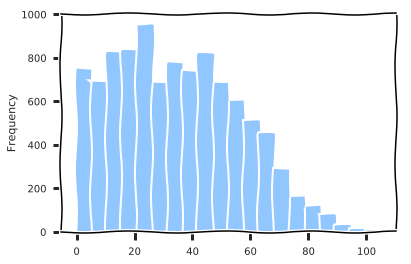

In [25]:
with plt.xkcd():
    pnad.idade.plot.hist(20);

Vamos voltar ao estilo que estávamos usando no começo.

In [23]:
sns.set(style='whitegrid', palette='pastel')

Você pode modificar diversos aspectos do gráfico usando diretamente comandos do pacote `matplotlib.pyplot`.   
Isso é feito usando a sigla `plt`.

Por exemplo, veja como é simples colocar títulos nos eixos:

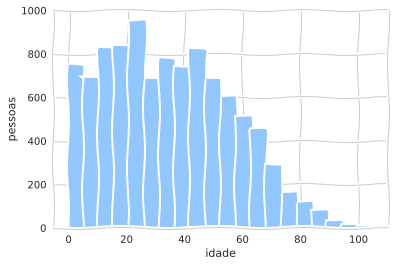

In [24]:
pnad.idade.plot.hist(20)
plt.xlabel('idade')
plt.ylabel('pessoas');

Para dar um zoom no gráfico, isto é, escolher onde os eixos começam e terminam: 

/home/patricia/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


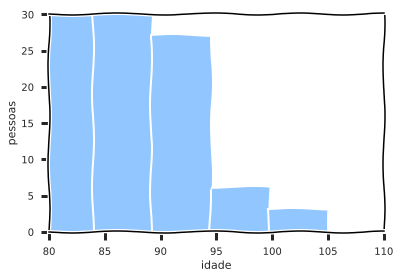

In [26]:
pnad.idade.plot.hist(20)
plt.xlabel('idade')
plt.ylabel('pessoas')
plt.xlim(80, 110)
plt.ylim(0, 30);

Dessa maneira é possível chamar a atenção para um parte específica do gráfico. Nesse caso, focamos nas pessoas mais idosas.  

Outra maneira de fazer algo parecido é usar o comando `query()` para recortar os dados.  

O gráfico abaixo é diferente do anterior porque não incluímos as idades maiores do que 100 e porque pedimos para dividir os dados em cinco classes.

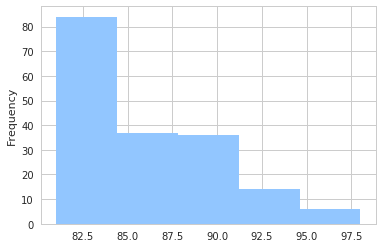

In [15]:
pnad.query('80 < idade < 100').idade.plot.hist(5);

### Gráfico de barras

Para fazer os próximos gráficos, vamos criar um novo dataframe, incluindo apenas as cinco primeiras observações.

In [11]:
pnad5 = pnad[:5]

Para fazer um gráfico de barras, a estrutura é igual àquela que usamos no histograma.

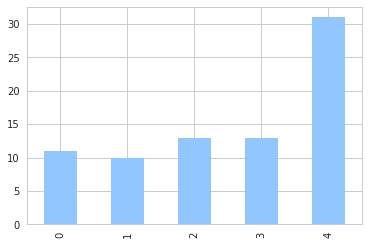

In [12]:
pnad5.idade.plot.bar();

Para que as barras sejam horizontais, use o comando `.barh()`.

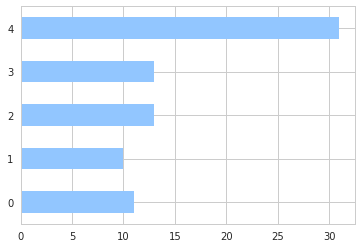

In [13]:
pnad5.idade.plot.barh();

Nesse tipo de gráfico, é muito importante ordenar os dados para tornar o gráfico menos confuso.  
Para isso, use o comando `sort_values()`.    
O argumento `ascending=False`, usa a ordem decrescente.

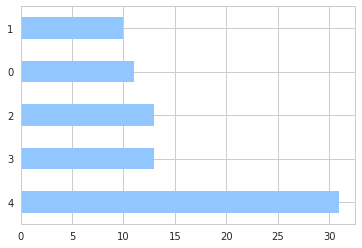

In [14]:
pnad5.idade.sort_values(ascending=False).plot.barh();

### Diagrama de dispersão 

<br>

Vamos voltar a usar o dataframe completo, pnad (não pnad5).

Para fazer um diagrama de dispersão, há uma diferença. 

Como serão utilizadas duas variáveis, ao invés de:

- `pnad.idade.plot.scatter()`

É preciso usar:

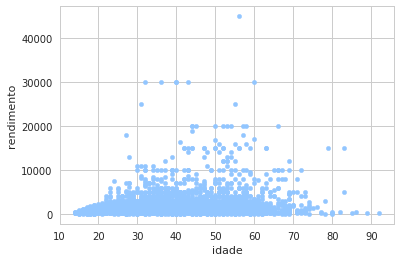

In [15]:
pnad.plot.scatter('idade', 'rendimento');

É possível fazer vários diagramas ao mesmo tempo.

Para simplificar, recortamos o dataframe para que tenha apenas três variáveis.

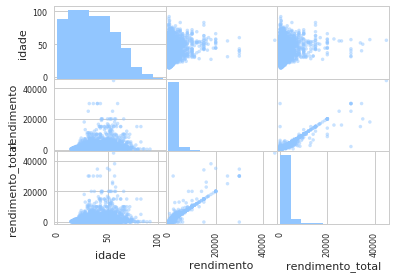

In [16]:
x = pnad[['idade', 'rendimento', 'rendimento_total']]
pd.plotting.scatter_matrix(x);

Note que nesse caso `.plot` aparece logo depois do dataframe, não depois do nome da variável (que agora fica dentro dos parêntesis.

A outra maneira de se fazer um diagrama de dispersão utiliza o pacote `seaborn`. 

Ele tem duas vantagens:

- inclui automaticamente uma reta de regressão;
- permite diferenciar por categorias, usando o argumento `hue()`.

Note que a estrutura desse comando é diferente: o dataframe agora aparece no argumento `data`. 

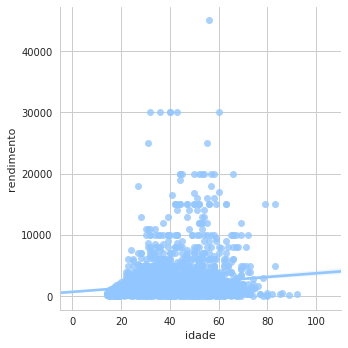

In [17]:
sns.lmplot('idade', 'rendimento', data=pnad);

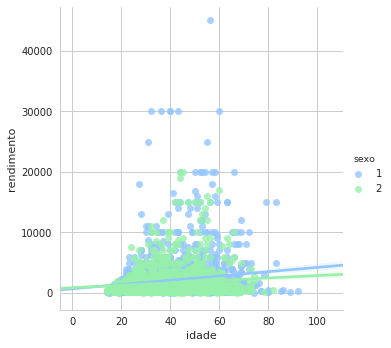

In [18]:
sns.lmplot('idade', 'rendimento', hue='sexo', data=pnad);

### Boxplot

<br>
A estrutura do boxplot é semelhante àquela do comando anterior.

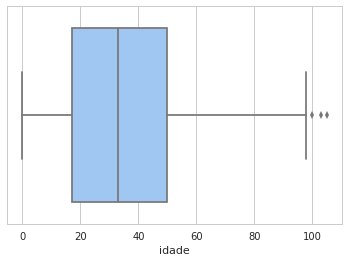

In [19]:
sns.boxplot('idade', data=pnad);

É possível fazer boxplots para diferentes subgrupos dos dados, escolhendo uma variável categórica como o eixo y.

Porém, antes é preciso transformar a variável em categórica.

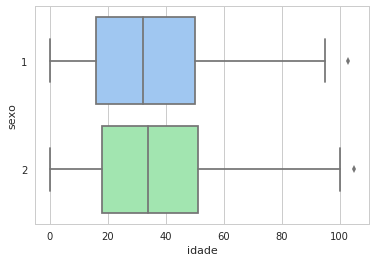

In [20]:
pnad.sexo = pnad.sexo.astype('category')

sns.boxplot('idade', 'sexo', data=pnad);